#### 1) 데이터 불러오기

In [1]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

#### 2) 데이터 살펴보기 (EDA)

In [4]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


##### 범주형 데이터의 카테고리별 개수 확인

In [8]:
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64


### 범주형 데이터 그리기

##### 1) 막대 그래프(bar graph)

In [9]:
#df의 첫 5행을 확인해봅시다. 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# tip 컬럼을 성별로 나눠보기
grouped = df['tip'].groupby(df['sex'])

# groupb 객체에 총합,평균,데이터 등이 저장됨

In [24]:
grouped.mean() # 성별에 따른 팁의 평균

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [25]:
grouped.size() # 성별에 따른 데이터 량(팁 횟수)

sex
Male      157
Female     87
Name: tip, dtype: int64

In [27]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [31]:
import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 바꿔줍니다.
sex

{'Male': 3.0896178343949052, 'Female': 2.833448275862069}

In [32]:
test = list(grouped.mean())
test

[3.0896178343949052, 2.833448275862069]

In [33]:
x = list(sex.keys())  
x

['Male', 'Female']

In [35]:
y = list(sex.values())
y

[3.0896178343949052, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

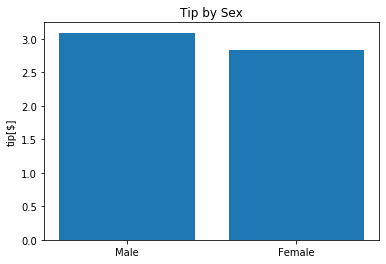

In [36]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

#### 1) - 2 Seaborn과 Matplotlib을 활용한 간단한 방법

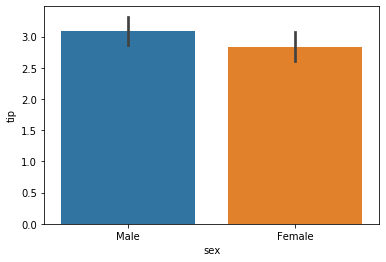

In [37]:
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by sex')

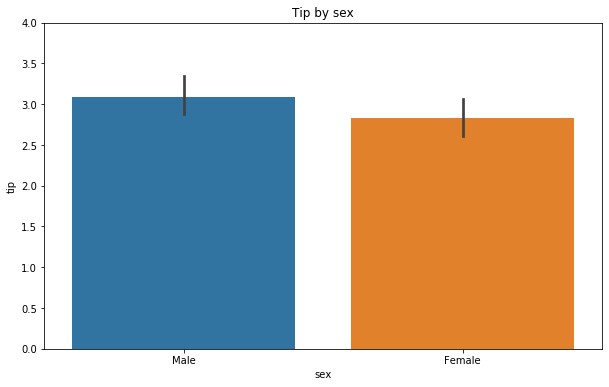

In [38]:
plt.figure(figsize=(10,6)) # 도화지 사이즈를 정합니다.
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

Text(0.5, 1.0, 'Tip by sex')

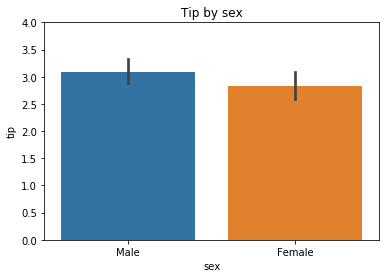

In [41]:
# DJ's practice
# wihtout figsize

sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

Text(0.5, 1.0, 'Tip by day')

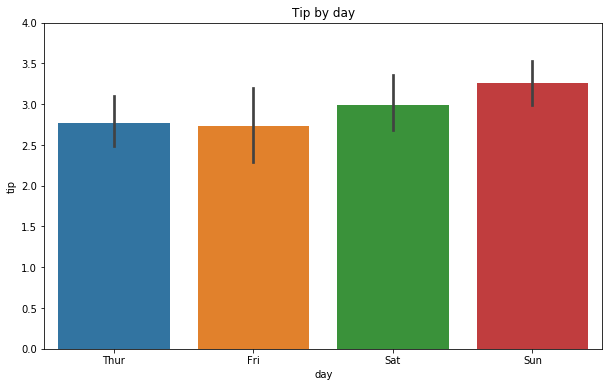

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

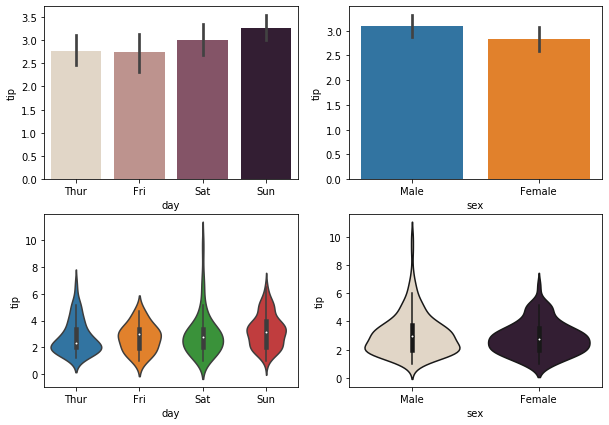

In [46]:
# DJ's practice

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip')

ax4 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip', palette="ch:.25")

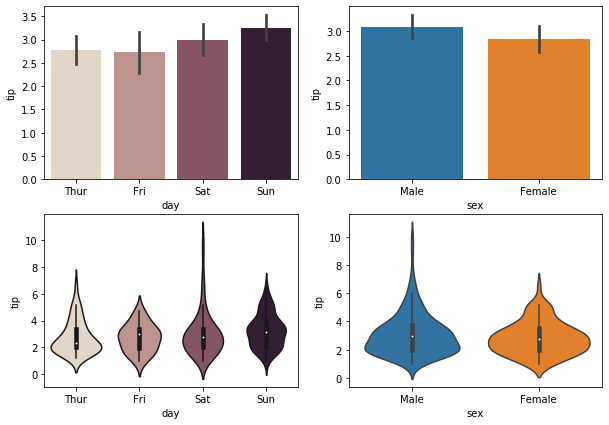

In [45]:
# violinplot, barplot 사용

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip',palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip',palette="ch:.25")

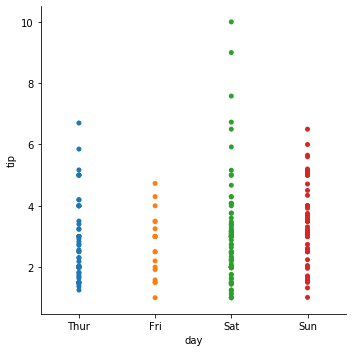

In [44]:
# catplot 사용
sns.catplot(x="day", y="tip", jitter=False, data=tips)

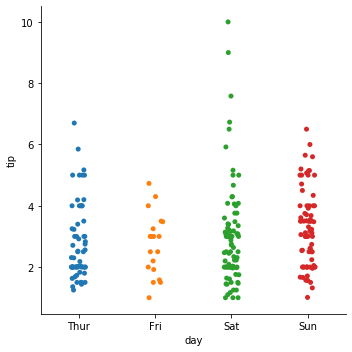

In [50]:
sns.catplot(data=df, x='day', y='tip', jitter=True)

### 수치형 데이터

#### 2) 산점도(scatter plot)

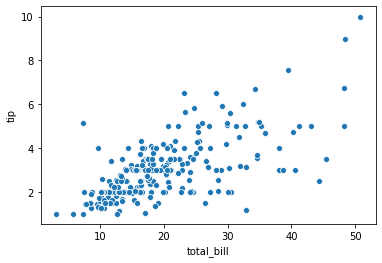

In [51]:
sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

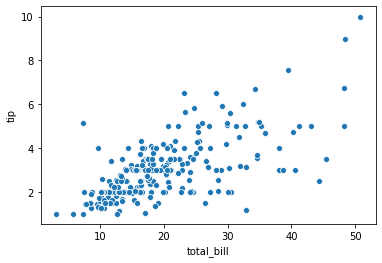

In [53]:
sns.scatterplot(data=df , x='total_bill', y='tip') # DJ's practice, without palette keyword

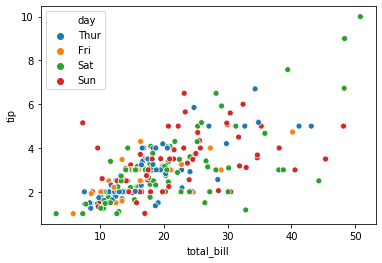

In [54]:
sns.scatterplot(data=df , x='total_bill', y='tip', hue='day')

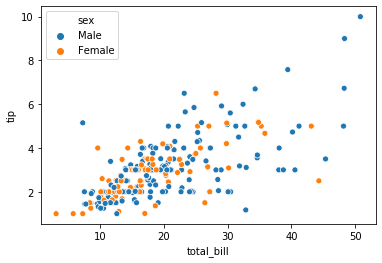

In [55]:
sns.scatterplot(data=df , x='total_bill', y='tip', hue='sex')

#### 3) 선 그래프(line graph)
- plot의 기본은 line임

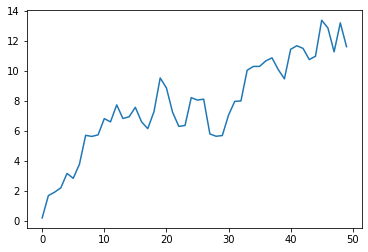

In [56]:
#np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다. 
#cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())

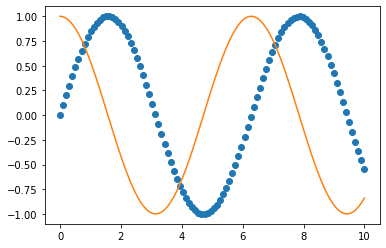

In [58]:
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x)) 
plt.show()

#### seaborn 활용

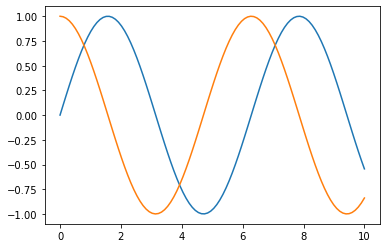

In [62]:
sns.lineplot(x, np.sin(x))
sns.lineplot(x, np.cos(x))

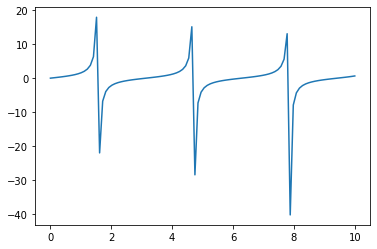

In [63]:
sns.lineplot(x, np.tan(x))

#### 4) 히스토그램

##### 히스토그램 만들기
- x1은 평균은 100이고 표준편차는 15인 정규분포를 따릅니다.
- x2는 평균은 130이고 표준편차는 15인 정규분포를 따릅니다.
- 도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기합니다.

In [72]:
# # DJ's practice

# mu1, mu2, sigma = 100, 130, 15
# x1 = mu1 +sigma*np.random.randn(10000)

# print(type(x1))
# print(x1.shape)
# print(x1.ndim)
# print("--------------------")
# t1 = np.random.randn(10000)
# print(t1.min(), ": min")
# print(t1.max(), ": max")

<class 'numpy.ndarray'>
(10000,)
1
--------------------
-3.925731380057265 : min
3.7296295738374345 : max


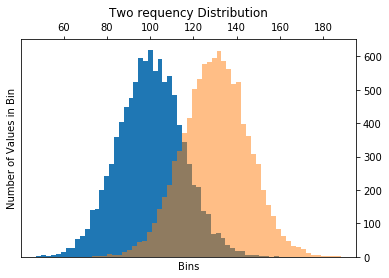

In [75]:
# DJ's practice

mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.hist(x1, bins=50)
ax1.hist(x2, bins=50, alpha=0.5)
ax1.xaxis.set_ticks_position('top')
ax1.yaxis.set_ticks_position('right')

plt.xlabel("Bins")
plt.ylabel("Number of Values in Bin")
plt.title("Two requency Distribution")

plt.show()

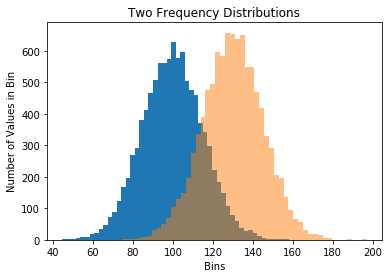

In [64]:
#그래프 데이터 
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False) #bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom') # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left') #y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

#### Seaborn으로 히스토그램 만들기

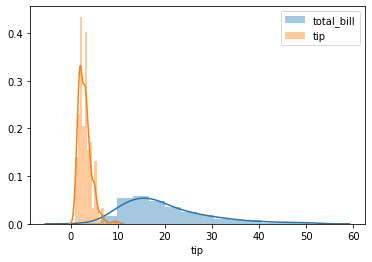

In [76]:
sns.distplot(df['total_bill'], label = "total_bill")
sns.distplot(df['tip'], label = "tip").legend()# legend()를 이용하여 label을 표시해 줍니다.

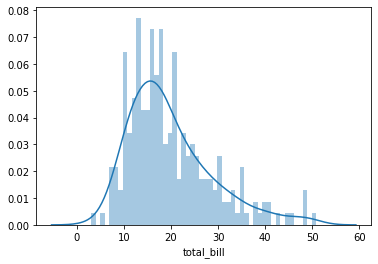

In [78]:
sns.distplot(df['total_bill'], bins=50)

No handles with labels found to put in legend.


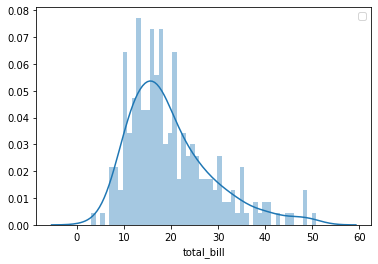

In [80]:
sns.distplot(df['total_bill'], bins=50).legend()

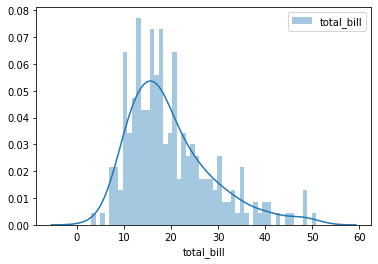

In [81]:
sns.distplot(df['total_bill'], bins=50, label='total_bill').legend()

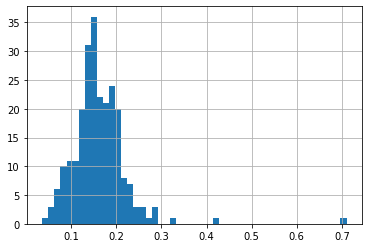

In [82]:
df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins=50)

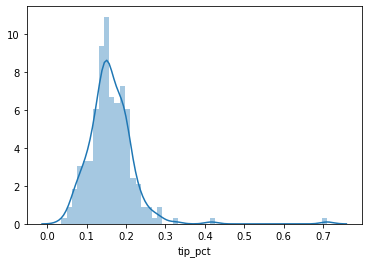

In [83]:
sns.distplot(df['tip_pct'], bins=50)

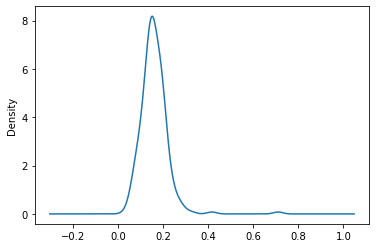

In [84]:
df['tip_pct'].plot(kind='kde')

## 10-5. 시계열 데이터 시각화하기

#### 1. 데이터 가져오기

In [86]:

csv_path = "flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


#### 2. 그래프 그리기

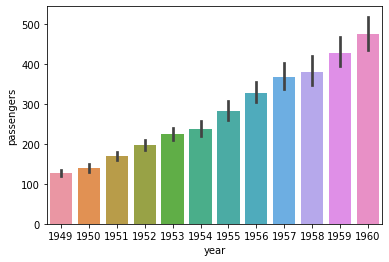

In [87]:
sns.barplot(x=flights['year'], y=flights['passengers'])

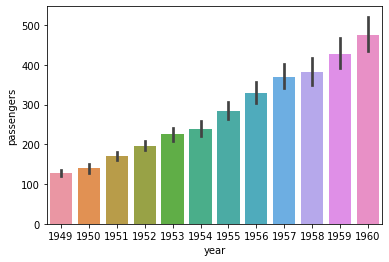

In [88]:
sns.barplot(data=flights, x='year', y='passengers')

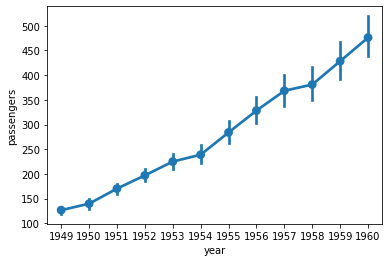

In [89]:
sns.pointplot(data=flights, x='year', y='passengers')

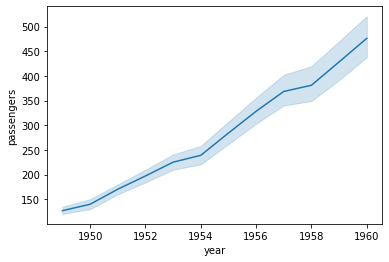

In [90]:
sns.lineplot(data=flights, x='year', y='passengers')

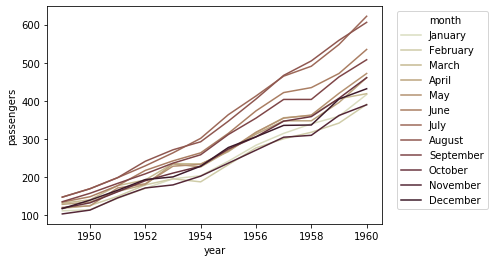

In [91]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

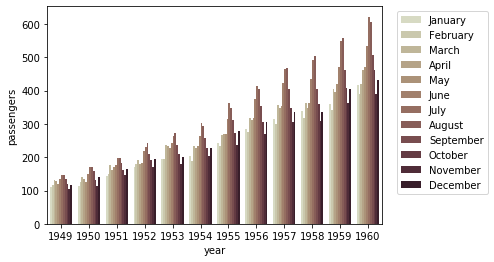

In [92]:
sns.barplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

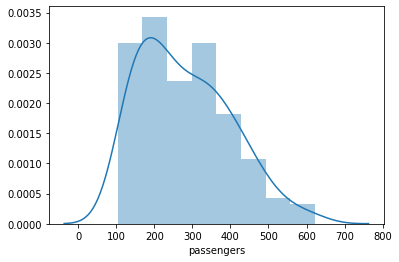

In [93]:
sns.distplot(flights['passengers'])

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

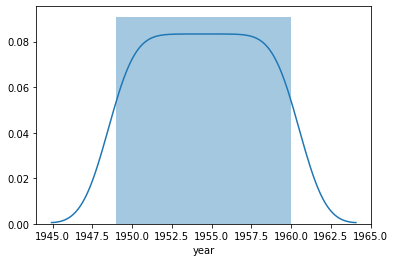

In [95]:
sns.distplot(flights['year'])

flights['year'].value_counts()

# 10-6. Heatmap

- Heatmap을 그리기 위해 데이터를 pivot해야 하는 경우가 있습니다.

In [97]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


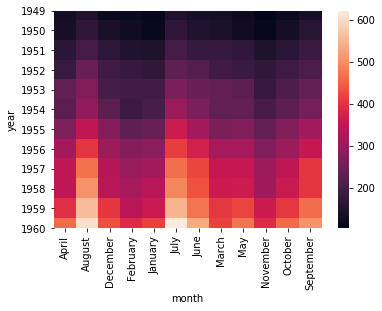

In [102]:
sns.heatmap(pivot)

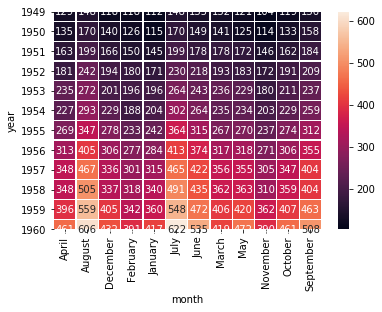

In [103]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

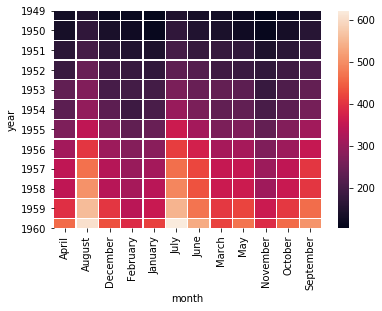

In [104]:
sns.heatmap(pivot, linewidths=.2, annot=False, fmt="d")

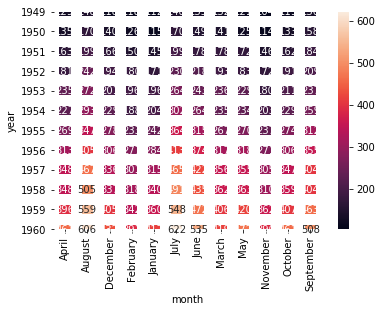

In [108]:
sns.heatmap(pivot, linewidths=10, annot=True, fmt="d")

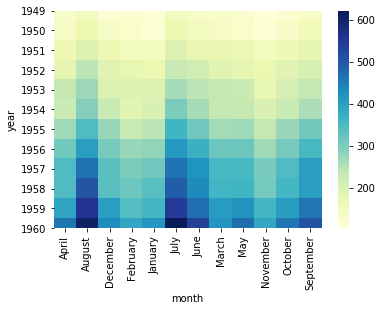

In [109]:
sns.heatmap(pivot, cmap="YlGnBu")